DIABETES CLASSIFICATION

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('../Downloads/Diabetes.csv')

In [37]:
df.shape
df.columns
type(df)

pandas.core.frame.DataFrame

In [49]:
df.Outcome.value_counts()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


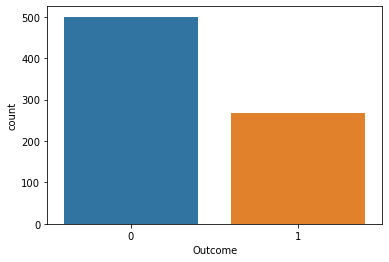

In [25]:
sns.countplot(x='Outcome' , data =df);
#more outcomes in which people don't have diabetes

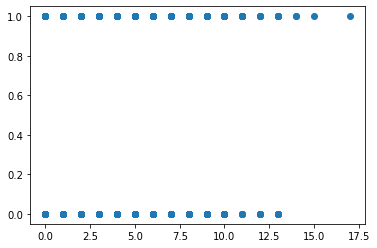

In [30]:
plt.scatter(df['Pregnancies'],df['Outcome'])

In [ ]:
sns.pairplot(df, diag_kind='kde', hue="Outcome") # plotting pairplot

In [91]:
data = df.values
np.random.shuffle(data)
X = data[:,:8]
#print(X)
Y = data[:,8]
#print(Y)
#Y.shape

[0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0.

(768,)

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

In [157]:
def dis(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=15):
    vals=[]
    m= X.shape[0]
    for i in range(m):
        d= dis(queryPoint,X[i])
        vals.append((d, Y[i]))
    vals= sorted(vals)
    vals =vals[:k]
    vals = np.array(vals)
    new_vals = np.unique(vals[:,1],return_counts=True)
    max_freq = new_vals[1].argmax()
    pred = new_vals[0][max_freq]
    return pred

In [165]:
p = knn(X_train, Y_train,X_test[101])
print(int(p))

0


In [166]:
print(int(Y_test[101]))

0


In [160]:
outputs = []
for i in range(100):
    pred = knn(X_train,Y_train,X_test[i])
    outputs.append(pred)
    
outputs = np.array(outputs)

In [161]:
#np.unique(Y_test,return_counts=True)
print(outputs)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1.]


In [162]:
acc = np.sum(outputs==Y_test[:100])/100.0
print(acc)

0.78
